In [82]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import re

In [96]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
x = np.array(data["Text"])
X1=data["Text"]
y = np.array(data["language"])
y1 = data["language"]
text_categories=y1.unique()

In [89]:
X2 = []
for text in X1:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        X2.append(text)

In [90]:
cv = CountVectorizer()
X = cv.fit_transform(X2)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.6)


In [91]:
data.groupby(y.tolist(),as_index=False).size()

,index,size
0,Arabic,1000
1,Chinese,1000
2,Dutch,1000
3,English,1000
4,Estonian,1000
5,French,1000
6,Hindi,1000
7,Indonesian,1000
8,Japanese,1000
9,Korean,1000


C:\Users\User\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_3680\3805497637.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(labels=y, rotation=60)


[Text(0, 0, 'Estonian'),
 Text(1, 0, 'Swedish'),
 Text(2, 0, 'Thai'),
 Text(3, 0, 'Tamil'),
 Text(4, 0, 'Dutch'),
 Text(5, 0, 'Japanese'),
 Text(6, 0, 'Turkish'),
 Text(7, 0, 'Latin'),
 Text(8, 0, 'Urdu'),
 Text(9, 0, 'Japanese'),
 Text(10, 0, 'Indonesian'),
 Text(11, 0, 'Portugese'),
 Text(12, 0, 'French'),
 Text(13, 0, 'Chinese'),
 Text(14, 0, 'Korean'),
 Text(15, 0, 'Thai'),
 Text(16, 0, 'Estonian'),
 Text(17, 0, 'Portugese'),
 Text(18, 0, 'Portugese'),
 Text(19, 0, 'Hindi'),
 Text(20, 0, 'Tamil'),
 Text(21, 0, 'Spanish')]

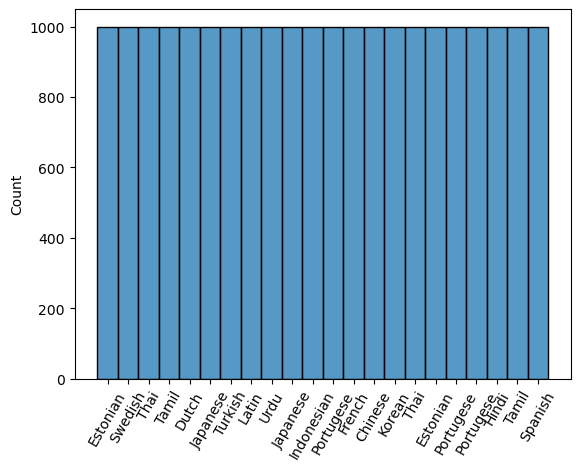

In [92]:
a=sns.histplot(y)
a.set_xticklabels(labels=y, rotation=60) 

In [93]:
model = MultinomialNB()
model.fit(X_train,y_train)
predicted_categories = model.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [95]:
print(classification_report(y_test, predicted_categories))

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       575
     Chinese       0.92      0.41      0.57       618
       Dutch       0.97      0.97      0.97       619
     English       0.67      1.00      0.80       606
    Estonian       0.99      0.95      0.97       610
      French       0.92      0.99      0.96       583
       Hindi       0.99      0.99      0.99       584
  Indonesian       0.98      0.99      0.98       611
    Japanese       0.66      0.80      0.72       603
      Korean       1.00      0.98      0.99       607
       Latin       0.97      0.92      0.94       592
     Persian       1.00      1.00      1.00       597
   Portugese       0.98      0.95      0.97       595
      Pushto       1.00      0.96      0.98       611
    Romanian       0.99      0.98      0.99       591
     Russian       0.99      0.99      0.99       609
     Spanish       0.97      0.98      0.97       617
     Swedish       0.98    

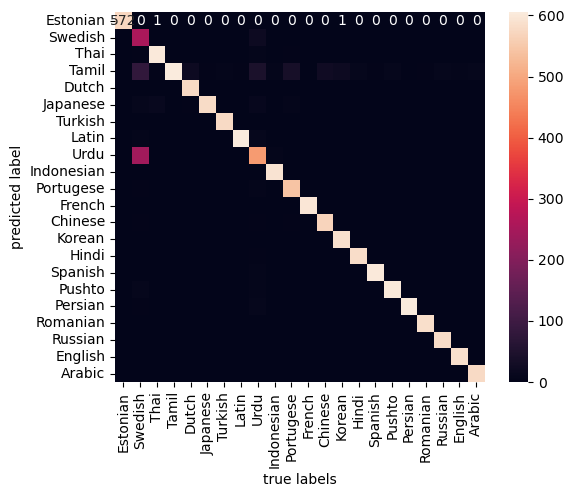

In [97]:
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", xticklabels=text_categories, yticklabels=text_cat)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()